### My primary responsibility as the newly recruited Data Scientist at Brooken Moon Films is to use data to create insights that can drive strategic decision-making. One of the most important projects I've been assigned is sentiment analysis on the IMDB movie reviews dataset.

Sentiment analysis, often known as opinion mining, is the technique of identifying and extracting subjective information from source materials using natural language processing, text analysis, and computational linguistics. In the case of Brooken Moon Films, this translates to examining movie reviews to gain a precise understanding of the audience's perceptions and feelings regarding our films. As a Film production company it is very important to understand the audience's underlying intentions and reactions to watch a film and after watching a film respectively.

Also, text mining for sentimental analysis has become a common practice in most businesses and is considered to be an easy job, but let's try to extract some deep meaningful insights from this dataset!

Link to dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Step 1

To import data from a CSV file into the dataframe, we use the 'pd.read_csv' function. Then we use 'df.head()' to view the top few rows of our dataframe. It's always a good idea to double-check your data to ensure that everything is loaded properly.

In [1]:
import pandas as pd

# Load the dataset
dframe = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataframe
dframe.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Step 2

Before we begin the analysis, we must first install several libraries. We're installing matplotlib and seaborn for data visualization (they'll help us construct graphs), as well as wordcloud to create a cool word cloud of our movie reviews. The exclamation point at the beginning of the line instructs our notebook to execute this command in the system shell. This is required for package installation.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 3

Let's begin exploring our data now that we have our tools! We're making a bar graph to show the number of good and negative ratings. This will give us an idea of how balanced our dataset is. If it is significantly skewed toward positive or negative, it may have an impact on how effectively our model learns. We're using seaborn, a matplotlib-based tool that provides a high-level interface for creating visually appealing and instructive statistical visuals.

Our Dataset is balanced. We can now work with the datasets to get insights.

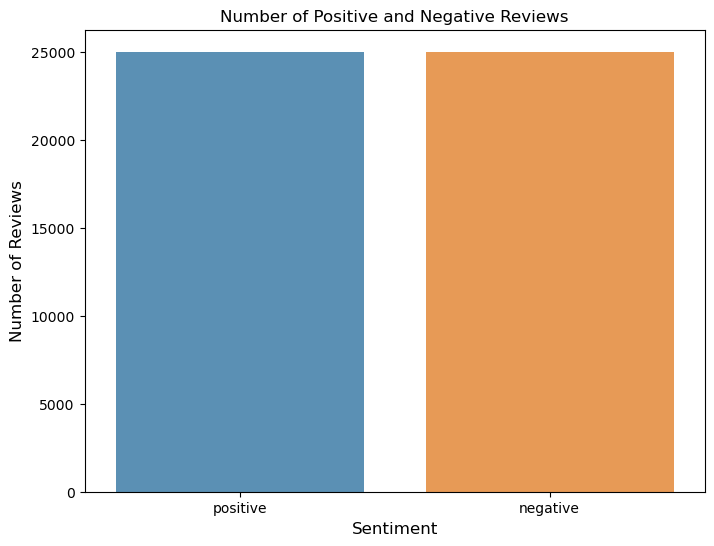

In [3]:

# Count the number of positive and negative reviews
sentiment_counts = dframe['sentiment'].value_counts()

# Create a bar plot of the number of positive and negative reviews
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, alpha=0.8)
plt.title('Number of Positive and Negative Reviews')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

# Step 4

We'll then make a word cloud. This is a fun way to visualize the words that appear the most frequently in our movie reviews. The larger a word appears in the cloud, the more frequently it appears in our text data. It's a quick and simple method to get a sense of the main themes or subjects discussed in our reviews. We can see "br" here, which makes no sense, thus we must eliminate it in later phases.


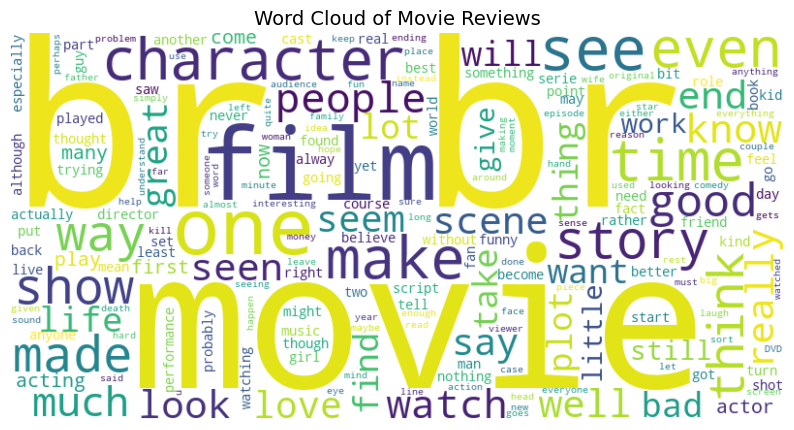

In [4]:
# Concatenate all the reviews into a single string
all_reviews = ' '.join(dframe['review'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews', fontsize=14)
plt.show()

# Step 5

Here, we're calculating the lengths of the reviews and plotting a histogram to visualize the distribution of review lengths. This can help us understand the variety in our data. For example, if most of our reviews are short, but a few are incredibly long, that could skew our results. Plus, it's just interesting to see how long most movie reviews tend to be!




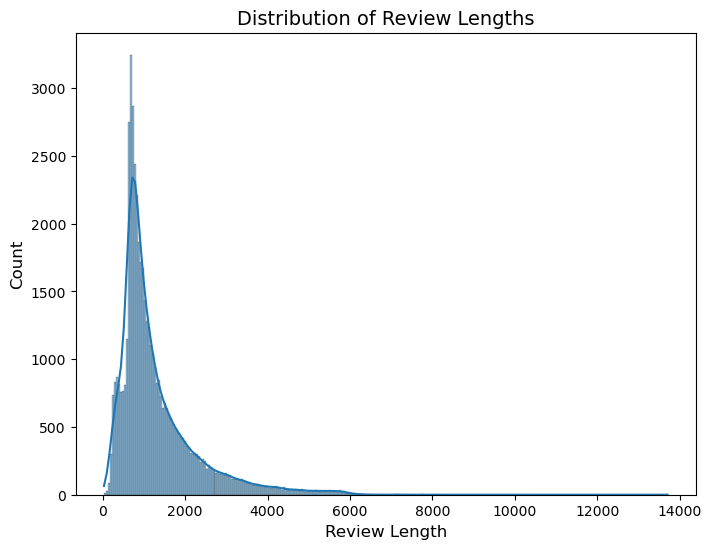

In [5]:
# Calculate the lengths of the reviews
review_lengths = dframe['review'].apply(lambda x: len(x))

# Plot the distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=review_lengths, kde=True)
plt.title('Distribution of Review Lengths', fontsize=14)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

##### From this graph we can see that the most people type reviews with 1000 words

1. 1000 words is an indication that most people are quite engaged when they write a review, positive or negative. People are willing to give detailed feedback.

2. We can uncover trends or patterns in consumer involvement by studying the distribution of review durations over time. If we detect a trend toward shorter reviews, it could suggest a shift in audience behavior or a desire to motivate customers to submit more specific comments. Understanding these patterns might assist us in tailoring our marketing and engagement tactics.


# Step 6

We're getting a little more specific with our review length analysis in this stage. We're plotting the distribution of review lengths again, but this time by sentiment (positive or negative) and a box plot for better comparison. This can assist us determine whether there is a difference in the length of favorable vs negative evaluations. Perhaps individuals write longer evaluations when they are extremely pleased (or dissatisfied) with a film?









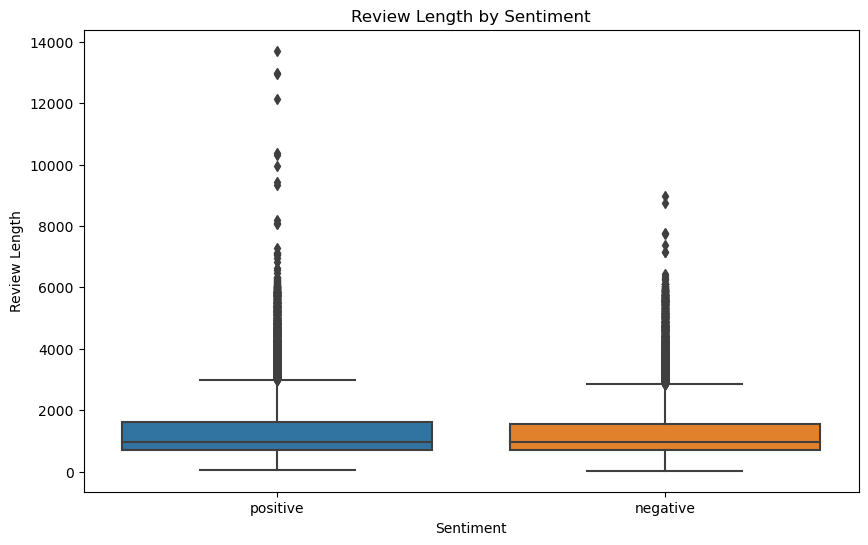

In [6]:
# Add a new column to df for review length
dframe['review_lengths'] = dframe['review'].apply(lambda x: len(x))

# Create a boxplot of review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_lengths', data=dframe)

plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

#### Insight: Positive reviews appear to be slightly longer than negative reviews in length. This could imply that when people are extremely satisfied, they are more likely to submit longer reviews to communicate their feelings.


##### How does this insight help us:

1. If positive evaluations tend to be lengthier, it may indicate that happy viewers are more engaged and ready to spend more time writing thorough feedback. Aside from box office data, this might be a good predictor of a film's success. A film that encourages viewers to submit lengthier favorable reviews may have a greater effect and last longer.

2. Longer reviews often contain more detailed feedback. If positive reviews are longer, it means that satisfied viewers are providing more information about what they liked. We can analyze these reviews to understand what aspects of the film resonated with the audience. This can guide future production decisions.

3. Positive reviews, especially detailed ones, can be a powerful promotional tool. We can highlight these reviews in marketing materials, on social media, or on the film's website to attract potential viewers.


# Step 7

### Pre-Processing the text

This step focuses on preparing text data in order to prepare it for subsequent analysis. We begin by importing the relevant libraries, which include re for regular expression handling, nltk for natural language processing, stopwords from the NLTK corpus to remove common English words, and PorterStemmer from NLTK for word stemming.


We are preparing the data in this stage by removing stop words and doing lemmatization. Stop words are words that have no significant meaning and are typically eliminated from texts. They include terms like 'is', 'an', 'the', and so on. The process of reducing inflected (or sometimes derived) words to their word stem, base, or root form is known as lemmatization. For example, the word 'running' would be shortened to 'run'. This aids in minimizing data complexity and bringing forth important information

The preprocess_text function takes an input text and performs several essential text preprocessing steps. It tokenizes the text, removing punctuation and common stopwords, and applies lemmatization to reduce words to their base form. The function then reconstructs the preprocessed text by joining the processed tokens back together. The output is a cleaned and normalized version of the input text, ready for further analysis or natural language processing tasks.

Finally, we apply the preprocessing function to the DataFrame's'review' column, resulting in the creation of a new column called 'processed_review' to hold the preprocessed text.

We standardize the text data by removing noise, converting to lowercase, deleting stopwords, and stemming words. This improves data quality and reduces dimensionality, preparing the text for further analytic tasks such as sentiment analysis or text categorization. Finally, we apply the preprocess_text function to the 'review' column of the DataFrame df and store the preprocessed text in a new column called 'preprocessed_review'.

In [7]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming your text data is stored in a DataFrame 'df' with a column 'review'

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply text preprocessing to the 'review' column
dframe['preprocessed_review'] = dframe['review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushphukan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushphukan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayushphukan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step 8

Here, we are just going to view the "preprocessed_view" column

In [8]:
dframe.head()

,review,sentiment,review_lengths,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching 1 oz episode '...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,basically 's family little boy jake think 's z...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei 's `` love time money '' visuall...


# Step 9

As we can see there's 'br' due to the <(br)> tag(inserts a single line break) in the processed data, so we have to remove it

In [9]:
dframe['preprocessed_review'] = dframe['preprocessed_review'].str.replace("br", "")


In [10]:
dframe.head()

,review,sentiment,review_lengths,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching 1 oz episode '...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming techniqu...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,basically 's family little boy jake think 's z...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei 's `` love time money '' visuall...


# Step 10 Topic Modeling

Now we can try doing topic modeling to identify common topics in the movie reviews. This could provide insight into what aspects of movies reviewers tend to focus on.

Reference: https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-ea3ebb2be9f4

Lets begin with the first step to it.

### Step 10.1 Text Vectorization

In this cell, we import the CountVectorizer class from scikit-learn. We create an instance of CountVectorizer and use it to transform the preprocessed text data in the 'preprocessed_review' column of the DataFrame df into numerical features. The resulting matrix X represents the text data in a vectorized form.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the preprocessed text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dframe['preprocessed_review'])

### Step 10.2 Applying LDA

Latent Dirichlet Allocation (LDA) is a popular statistical model for topic modeling, which is a method for discovering latent themes or topics in a corpus of documents. LDA is based on the idea that each document in the collection is a conglomeration of multiple subjects, and that each topic is represented by a unique word distribution. This approach identifies latent patterns and structures in documents, making it easier to extract significant insights and underlying themes from text data.

In this cell, we import the LatentDirichletAllocation class from scikit-learn. We define the number of topics (num_topics) and create an instance of LatentDirichletAllocation. We fit the LDA model to the vectorized data X, which represents the preprocessed text. The LDA algorithm learns the underlying topics and their word distributions from the text data.

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics and run LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

### Step 10.3  Interpreting and Visualizing the Topics

The cell outputs the most representative words for each subject generated by the LDA model. It does this by doing the following steps:

1. The vectorizer object's get_feature_names_out() function is used to retrieve the feature names that correspond to the words in the vectorized matrix.

2. The top_words variable is set to the number of top words to display for each topic.

3. The function goes over each subject, obtaining the indices that sort the topic's word distribution in ascending order using topic.argsort().

4. The code picks the indices corresponding to the top words in descending order by utilizing indexing [:-top_words - 1:-1].

5. The feature indices that have been chosen are utilized to extract the appropriate words from the feature_names list.

6. For each, the topic number and the top words are printed. 

In [13]:
# Extract the most representative words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words_count = 10  # Number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_feature_indices = topic.argsort()[:-top_words_count-1:-1]
    top_words = [feature_names[i] for i in top_feature_indices]
    print(f"Topic {topic_idx + 1}:")
    print(top_words)
    print()


Topic 1:
['film', 'movie', 'one', 'like', 'horror', 'bad', 'even', 'scene', 'get', 'make']

Topic 2:
['film', 'character', 'one', 'story', 'well', 'scene', 'time', 'love', 'also', 'like']

Topic 3:
['film', 'one', 'life', 'story', 'time', 'movie', 'well', 'man', 'also', 'performance']

Topic 4:
['show', 'episode', 'series', 'one', 'time', 'like', 'war', 'year', 'would', 'tv']

Topic 5:
['movie', 'like', 'one', 'film', 'good', 'really', 'time', 'would', 'see', 'even']



#### Insights:

Topic 1: It appears that this topic is about horror movies, as terms like "film," "movie," "horror," "bad," and "scene" are prevalent. It implies that this topic might focus around horror film discussions or reviews.

Topic 2: The wording in this subject suggest that the emphasis is on character-driven storylines and well-executed situations. It cites "character," "story," "scene," and "love," implying that this topic might include conversations about character development and impactful movie sequences.

Topic 3: This topic seems to revolve around life stories and performances. Words like "life," "story," "movie," "man," and "performance" are prevalent, indicating discussions about the portrayal of life experiences and the quality of performances in films.

Topic 4: The terms in this subject indicate a preference for TV shows and series. It contains terminology such as "show," "episode," "series," and "tv," which refer to conversations about television programming and the presentation of various episodes and series.

Topic 5: This topic seems to encompass general opinions about movies. It includes words like "movie," "like," "good," "really," and "see," suggesting that this topic may involve discussions about movie preferences, enjoyment, and recommendations.

##### How these insights help us?

1. The highlighted topics can be used as inspiration for developing engaging and useful content. For example, if horror movies or character-driven stories are popular themes, we might consider making films or shows that appeal to these interests, boosting our chances of engaging with the audience and generating interest in our works.

2. Analyzing topics highlighted in reviews and debates might provide insight into the issues that are already well-covered by existing market productions. This assists us in identifying possibilities to distinguish our content and concentrate on underrepresented or specialist themes with the potential to attract a committed audience.

# Step 11 Named Entity Recognition(NER)

We could use NER to identify the names of people, places, or organizations that are mentioned in the reviews. This could provide insights into which actors, directors, or locations are mentioned most often in positive or negative reviews.


In this code:

1. The spaCy library is imported, and the English model is loaded using spacy.load("en_core_web_sm"). (Used the smaller model for faster results)

2. The code iterates over the 'preprocessed_review' column in 'dframe'.

3. For each text, nlp(text) creates a spaCy Doc object representing the analyzed document.

4. Named entities and their labels are extracted from the document using a list comprehension and stored in separate lists entity_texts and entity_labels.

5. The extracted named entities and labels are appended to the respective lists entities and labels.

6. Finally, the extracted entities and labels are added as new columns 'entities' and 'labels' to the DataFrame df.

In [14]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Assuming your dataset is stored in a DataFrame named 'df' with a column named 'text'

# Create empty lists to store the named entities and labels
entities = []
labels = []

# Iterate over the text data in the 'text' column
for text in dframe['preprocessed_review']:
    doc = nlp(text)
    # Extract named entities and labels from the document
    entity_texts = [entity.text for entity in doc.ents]
    entity_labels = [entity.label_ for entity in doc.ents]
    # Append the named entities and labels to the respective lists
    entities.append(entity_texts)
    labels.append(entity_labels)

# Add the extracted entities and labels as new columns in the DataFrame
dframe['entities'] = entities
dframe['labels'] = labels


In [15]:
dframe.head()

,review,sentiment,review_lengths,preprocessed_review,entities,labels
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching 1 oz episode '...,"[one, 1, muslim gangsta, christian, italian, i...","[CARDINAL, CARDINAL, ORG, NORP, NORP, NORP, OR..."
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming techniqu...,"[michael sheen ``, williams]","[PERSON, PERSON]"
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,"[summer weekend, 2, one, decade, johanson, cro...","[DATE, CARDINAL, CARDINAL, DATE, PERSON, PERSON]"
3,Basically there's a family where a little boy ...,negative,748,basically 's family little boy jake think 's z...,"[first, 3 10]","[ORDINAL, CARDINAL]"
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei 's `` love time money '' visuall...,"[mattei, vivid portrait human relation movie, ...","[PERSON, ORG, PERSON, GPE, CARDINAL, CARDINAL,..."


#### Lets make an other column for film related entites, which may include labels like MOVIE, PERSON or GPE

In [16]:
# Define the film-related labels to filter
film_labels = ['MOVIE', 'PERSON', 'ORG', 'GPE']

# Create an empty list to store the film-related entities
film_entities = []

# Iterate over the entities and labels in each row
for entities, labels in zip(dframe['entities'], dframe['labels']):
    # Filter the entities based on film-related labels
    film_entities_row = [entity for entity, label in zip(entities, labels) if label in film_labels]
    film_entities.append(film_entities_row)

# Add the film-related entities as a new column in the DataFrame
dframe['film_entities'] = film_entities

In [17]:
dframe.head()

,review,sentiment,review_lengths,preprocessed_review,entities,labels,film_entities
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching 1 oz episode '...,"[one, 1, muslim gangsta, christian, italian, i...","[CARDINAL, CARDINAL, ORG, NORP, NORP, NORP, OR...",[muslim gangsta]
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming techniqu...,"[michael sheen ``, williams]","[PERSON, PERSON]","[michael sheen ``, williams]"
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,"[summer weekend, 2, one, decade, johanson, cro...","[DATE, CARDINAL, CARDINAL, DATE, PERSON, PERSON]","[johanson, crown jewel]"
3,Basically there's a family where a little boy ...,negative,748,basically 's family little boy jake think 's z...,"[first, 3 10]","[ORDINAL, CARDINAL]",[]
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei 's `` love time money '' visuall...,"[mattei, vivid portrait human relation movie, ...","[PERSON, ORG, PERSON, GPE, CARDINAL, CARDINAL,...","[mattei, vivid portrait human relation movie, ..."


##### How these insights are useful to us:

1. Analyzing the production companies and organizations mentioned in the reviews allows us to identify potential collaboration opportunities. We can identify production companies that have a strong presence or positive reputation among the audience. Collaborating with such companies can help us leverage their expertise, resources, and audience reach to enhance the quality and success of our productions.


2. Monitoring the film-related companies mentioned in the reviews allows us to remain up to date on the newest industry developments. We can stay current in the ever-changing film business by spotting budding performers, rising directors, and new film titles. It enables us to remain ahead of the curve and make educated judgments regarding casting, screenplay selection, and genre preferences.


3. The film-related entities extracted from the reviews can provide valuable input for our marketing and promotion efforts. We can leverage the identified movie titles, popular actors, and acclaimed directors to create targeted marketing campaigns that resonate with the audience. This knowledge helps us highlight the unique aspects of our productions and effectively communicate with potential viewers.

# Step 12 Building the Classifier Model

Now that we have performed some Exploratory Data Analysis on the Dataset,we can start building a classifier model to classify the review into "Positive" and "Negative".

### Step 12.1 TF-IDF Feature Matrix
We can do that by turning the 'preprocessed_review' into a TF-IDF feature matrix. Term Frequency-Inverse Document Frequency is abbreviated as TF-IDF. It is a method of representing text data for machine learning. The frequency of a term in a single document (in this case, a movie review) is considered by TF-IDF, as is the frequency of the word in the full dataset of documents. This helps to give each word weight. Words that appear frequently in a single review but not in all reviews are given additional weight. This is because these terms are more likely to have an impact on the review's attitude/sentiment.



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit-transform the preprocessed text data
X = vectorizer.fit_transform(dframe['preprocessed_review'])

# Get the corresponding sentiment labels
y = dframe['sentiment']

### Step 12.2 Splitting the dataset into training and testing data



In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 12.3 Applying Logistic Regression with hyperparameter-tuning

In this step, we apply Logistic Regression. We have also hypertuned a few parameters, we are specifying different values for the regularization parameter C and the penalty type penalty (we use only 'l2' penalty).

The regularization parameter and penalty are important components of the logistic regression technique because they assist control overfitting and improve model performance. 

C is basically the strength of regularization
The penalty is a regularization term that is added to the loss function during model training.('l2' penalty (Ridge regularization))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

# Create the Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Logistic Regression model with the best hyperparameters
logreg_best = LogisticRegression(solver='lbfgs', max_iter=1000, **best_params)

# Train the model
logreg_best.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = logreg_best.predict(X_val)

# Calculate the accuracy of the model

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [21]:
from sklearn.metrics import classification_report
y_pred = logreg_best.predict(X_val)

# Generate a classification report
report = classification_report(y_val, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Step 12.4 Applying Naive Bayes Classifier to compare with the previous model

Here, we are going to try another algorithm to compare the perfomances of the two and probably hypertune the better performing algorithm further, for better results.

We, have used Naive Bayes Classifier, another great classification algorithm.

The parameter for hypertuning used here are:

'alpha': The Laplace smoothing or additive smoothing parameter is represented by this parameter. Laplace smoothing is a technique used in Naive Bayes models to deal with the problem of zero probability. It increases the probability computation by adding a small constant number (alpha) to the numerator and a multiple of alpha to the denominator. Even for unknown features, the chance is not zero when alpha is included. We provide a selection of values [0.1, 1, 10] in the 'alpha' parameter to test different amounts of smoothing.

'fit_prior': This parameter controls whether class prior probabilities are learned from training data or a uniform prior is used. The model will estimate the class prior probability based on the relative frequencies of the classes in the training data if 'fit_prior' is set to True. If 'fit_prior' is set to False, the model assumes a uniform prior, giving each class equal probabilities.

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define the hyperparameters to search over
param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

# Create the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Naive Bayes classifier with the best hyperparameters
naive_bayes_best = MultinomialNB(**best_params)

# Train the classifier
naive_bayes_best.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = naive_bayes_best.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred)
print("Naive Bayes Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)


Naive Bayes Accuracy: 0.8654
Best Hyperparameters: {'alpha': 1, 'fit_prior': False}


In [23]:
y_pred = naive_bayes_best.predict(X_val)
classification_rep = classification_report(y_val, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Conclusion

So now, we can conclude that the Logistic Regression Algorithm is working better than the Naive Bayes Classifier.
Therefore we can use use Logistic Regression for classification for this dataset.

Overall, the findings of our research provide our film production firm with significant information on audience feelings, preferences, and industry trends. With this knowledge, we will be able to make data-driven decisions throughout the film production process. We may concentrate on making films that appeal to audiences' interests, collaborating with successful industry entities, and developing efficient marketing methods that highlight the distinctive qualities of our projects. We are set to make fascinating and relevant films that capture audiences and drive our company's success in the highly competitive film business by exploiting these insights.



# References

https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17
<br>

https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-ea3ebb2be9f4
<br>

https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
<br>

https://stackoverflow.com/

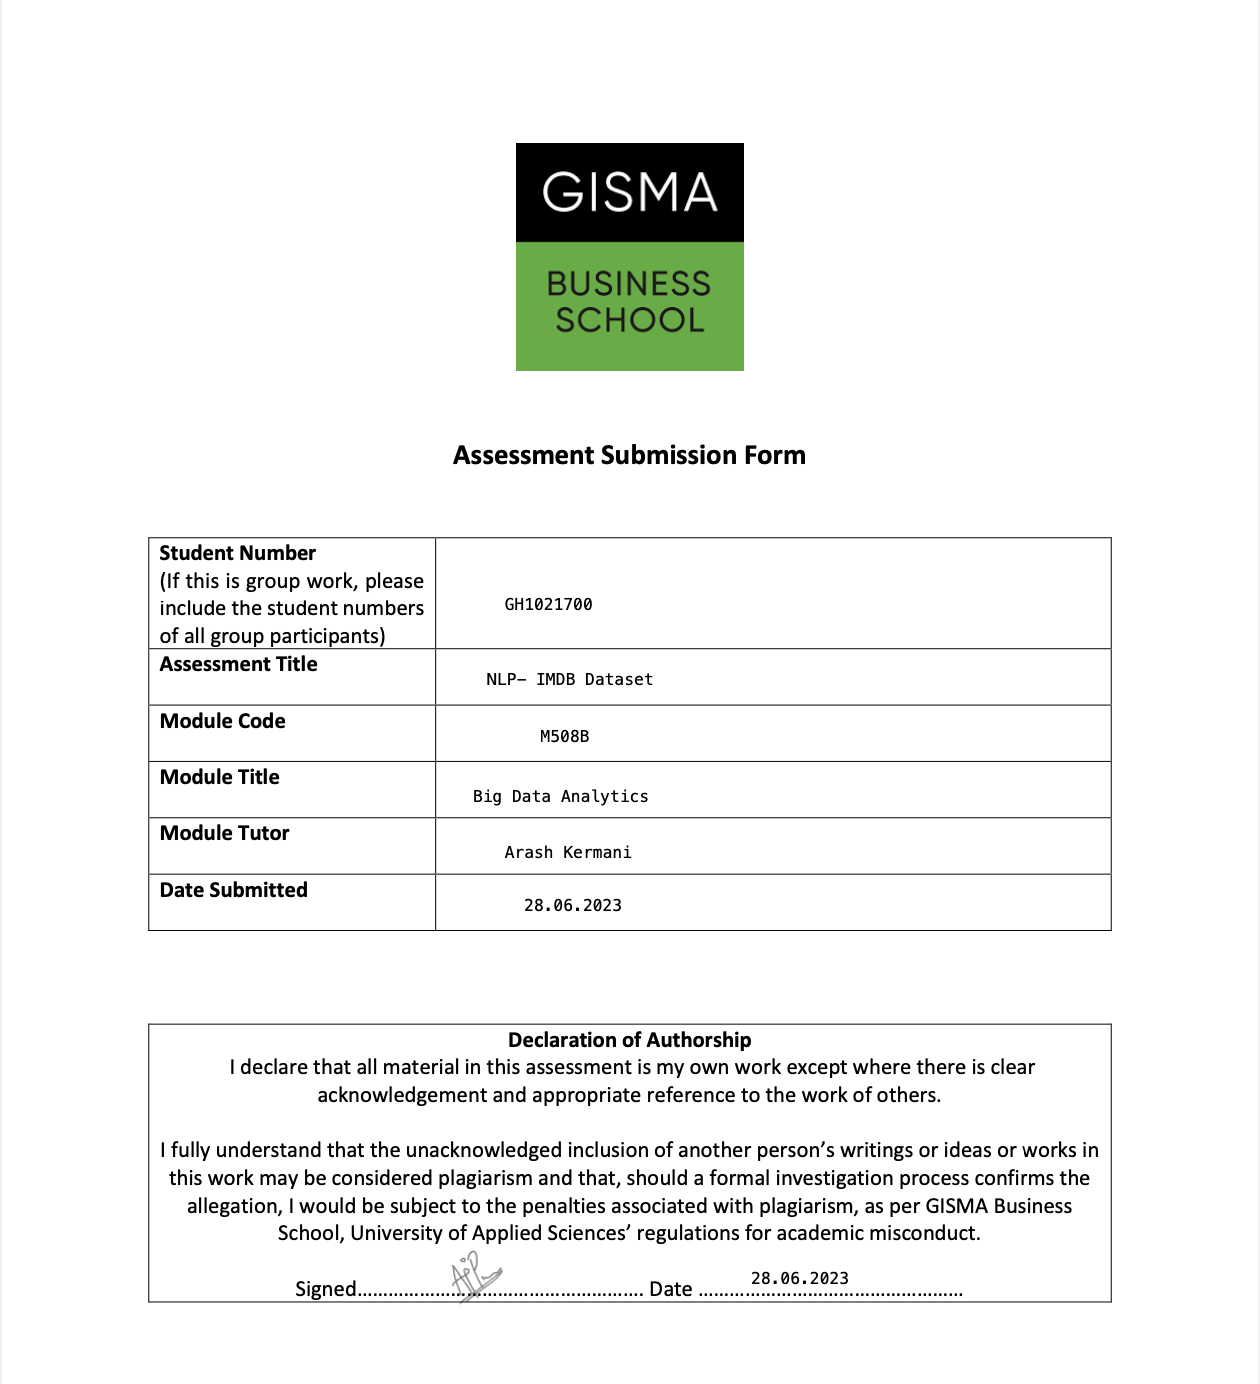